# Linear Regression(Simple) from Scratch in Python

In [31]:
import pandas as pd
import numpy as np

In [32]:
data=pd.read_table('https://raw.githubusercontent.com/FeezyHendrix/LinearRegressionfromscrath/master/dataset.csv',sep=',')

In [33]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**Main columns which we have to work upon is head_size and brain_weight**

**we are calculating the values for y=mx+b as we know this is the equeation of linear rigression**

**m(slope) and b(intercept) here are the scale factor and bias coefficient respectively**

**y here is the independent variable and dependent variable**

**we will establish a linear relationship between the input variables(X) and single output variable**

![somehow](https://uc-r.github.io/public/images/analytics/regression/sq.errors-1.png "We are going to achive this")

**This is that we are going to achieve**

In [12]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(data.shape)


(237, 4)


In [13]:
#pandas taking values
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [14]:
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [15]:
#total number of values
n = len(X)

**To find the values of m and b, we will need mean of X and Y. We will find these and the coeffients.**



![somehow](https://www.wired.com/images_blogs/wiredscience/2011/01/LaTeXiT-1-20.jpg "We are going to achive this")

In [16]:
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
m = numerator / denominator
b = y_mean - (m * x_mean)

#printing the coefficient
print(m, b)

# output : 0.26342933948939945 325.57342104944223

0.26342933948939945 325.57342104944223


**BrainWeight=325.573421049+0.263429339489∗HeadSize**

**Now we have everything lets plot the values**

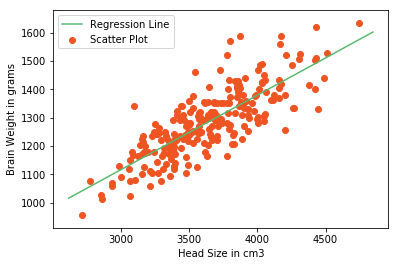

In [21]:

max_x = np.max(X) + 100 #we are taking + 100 and-100 becouse we want line just above and below the points so that all points are covered
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b + m * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

**lets check how good is our model. as shown in the very first image we are calculating the disance away from line**

**will use Root Mean Squared Error**

![somehow](https://i.stack.imgur.com/RIq96.jpg "We are going to achive this")


#d and p are y[i],y_pred respectively 

rmse = 0
for i in range(n):
    y_pred=  b + m* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)

print(rmse)




**Coefficient of determination which is r*r**

![somehow](https://www.allbusiness.com/asset/image/glossaries/4967195.gif "We are going to achive this")


In [55]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b + m * X[i]
    ss_t += (Y[i] - y_mean) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


**Now lets do this by using scikit learn**

In [59]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)



72.1206213783709
0.639311719957
